# Overfitting and Deterministic Noise

## Question 1:

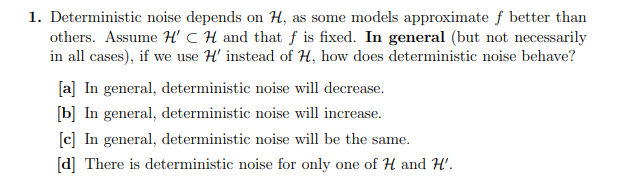

Correct Answer: **B**

Deterministic noise is defined informally as *the part of f that the hypothesis set cannot capture*

In general having a larger hypothesis set will mean you can: capture f better and thus will reduce deterministic noise, thus having a **smaller hypothesis set** $\mathcal{H}'$ will **increase deterministic noise**

<hr/>

# Regularization with Weight Decay

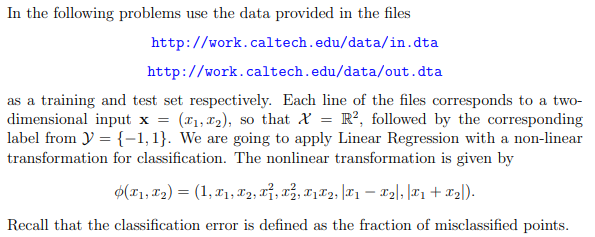

In [1]:
#load data

import requests

try:
    with open("in.dta", "x") as f_in:
        request_in = requests.get("http://work.caltech.edu/data/in.dta")
        f_in.write(request_in.text)
        print("Downloaded training data")
except FileExistsError as e:
    print("Training data already downloaded")

try:
    with open("out.dta", "x") as f_out:
        request_out = requests.get("http://work.caltech.edu/data/out.dta")
        f_out.write(request_out.text)
        print("Downloaded test data")
except FileExistsError as e:
    print("Test data already downloaded")

Training data already downloaded
Test data already downloaded


In [2]:
import numpy as np
import matplotlib.pyplot as plt

training_data = np.loadtxt("in.dta")
testing_data = np.loadtxt("out.dta")

train_data_x, train_data_y = training_data[:,0:2], training_data[:,2]
test_data_x, test_data_y = testing_data[:,0:2], testing_data[:,2]

def non_lin_trans(row):
    x_1 = float(row[0])
    x_2 = float(row[1])
    out = np.array([1.0,x_1,x_2,x_1**2,x_2**2,x_1*x_2,abs(x_1-x_2),abs(x_1+x_2)])
    return out

def in_sample_err_report(w):
    in_err_count = 0
    
    for data_pt in range(train_data_x.shape[0]):
        x = train_data_x[data_pt,:,np.newaxis]
        z = non_lin_trans(x)
        predicted_label = np.sign(w.T@z)
        actual_label = train_data_y[data_pt]
        if predicted_label != actual_label:
            in_err_count += 1
        
    print(f'In sample error = {in_err_count/train_data_x.shape[0]}')
    return in_err_count/train_data_x.shape[0]

def out_sample_err_report(w):
    out_err_count = 0

    for data_pt in range(test_data_x.shape[0]):
        x = test_data_x[data_pt,:,np.newaxis]
        z = non_lin_trans(x)
        predicted_label = np.sign(w.T@z)
        actual_label = test_data_y[data_pt]
        if predicted_label != actual_label:
            out_err_count += 1
    
    print(f'Out sample error = {out_err_count/test_data_x.shape[0]}')
    return out_err_count/test_data_x.shape[0]

## Question 2:

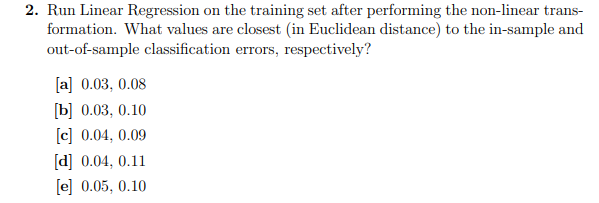

In [3]:
transformed_train_data = np.zeros((train_data_x.shape[0],8))

for row_num in range(train_data_x.shape[0]):
    transformed_train_data[row_num,:] = non_lin_trans(train_data_x[row_num,:])
    
#now perform linear regression on this new matrix
X = transformed_train_data

w = np.linalg.inv(X.T@X)@X.T@train_data_y
w = w[:,np.newaxis]

#In-sample error
in_sample_err_report(w)

#Out-of-sample error
out_sample_err_report(w)

In sample error = 0.02857142857142857
Out sample error = 0.084


0.084

Correct Answer: **A** 

(0.0286, 0.084) closest to (0.03, 0.08)

## Question 3:

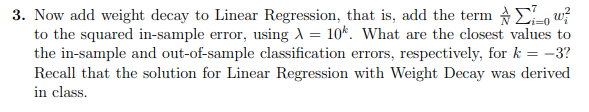

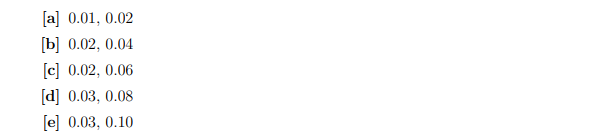

We can reuse some of the basic constructions above. The updated solution for linear regression with weight decay has the following form:
$$\mathbf{w} = (X^TX + \lambda I)^{-1}X^T\mathbf{y}$$

In [4]:
#linear regression with weight decay
X = transformed_train_data

k = -3

lmda = 10**(k)

w_1 = np.linalg.inv(X.T@X + lmda*np.eye(8))@X.T@train_data_y
w_1 = w_1[:,np.newaxis]

#In-sample error
in_sample_err_report(w_1)

#Out-of-sample error
out_sample_err_report(w_1)

In sample error = 0.02857142857142857
Out sample error = 0.08


0.08

Correct Answer: **D**

(0.0286, 0.08) closest to (0.03, 0.08)

## Question 4:

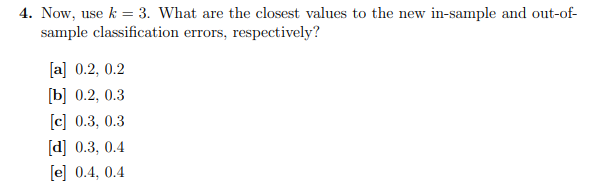

In [5]:
#linear regression with weight decay
X = transformed_train_data

k = 3

lmda = 10**(k)

w_2 = np.linalg.inv(X.T@X + lmda*np.eye(8))@X.T@train_data_y
w_2 = w_2[:,np.newaxis]

#In-sample error
in_sample_err_report(w_2)

#Out-of-sample error
out_sample_err_report(w_2)

In sample error = 0.37142857142857144
Out sample error = 0.436


0.436

Correct Answer: **E**

(0.3714, 0.436) closest to (0.4, 0.4)

## Question 5:

In [6]:
error_list = []

for k in range(2, -3, -1):
    #linear regression with weight decay
    X = transformed_train_data
    lmda = 10**(k)

    w = np.linalg.inv(X.T@X + lmda*np.eye(8))@X.T@train_data_y
    w = w[:,np.newaxis]
    print(f'k = {k}')
    error_list.append((in_sample_err_report(w),out_sample_err_report(w)))
    print('---')

k = 2
In sample error = 0.2
Out sample error = 0.228
---
k = 1
In sample error = 0.05714285714285714
Out sample error = 0.124
---
k = 0
In sample error = 0.0
Out sample error = 0.092
---
k = -1
In sample error = 0.02857142857142857
Out sample error = 0.056
---
k = -2
In sample error = 0.02857142857142857
Out sample error = 0.084
---


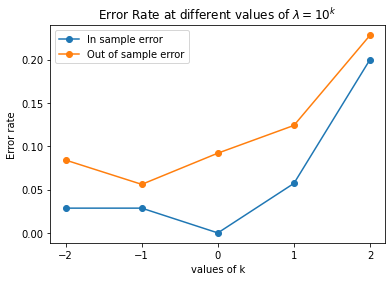

In [8]:
x = [2,1,0,-1,-2]
in_err = list(map(lambda x: x[0], error_list))
out_err = list(map(lambda x: x[1], error_list))

fig, ax = plt.subplots()

ax.plot(x,in_err, marker='o')
ax.plot(x,out_err, marker='o')
   
ax.set(xlabel='values of k', ylabel='Error rate', title='Error Rate at different values of $\lambda = 10^k$')
plt.legend(['In sample error','Out of sample error'])
plt.xticks([-2,-1,0,1,2])
plt.show()

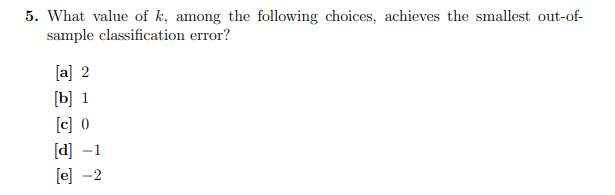

Correct Answer: **D**

(Minimum $E_{out}$ achieved at $k = -1$)

## Question 6:

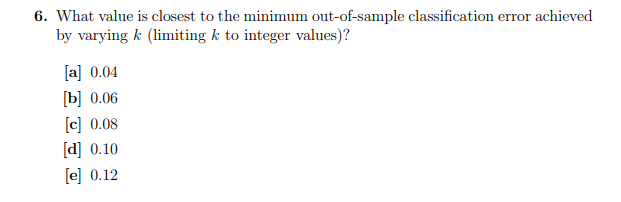

Correct Answer: **B**

(Minimum $E_{out} = 0.056$ closest to $0.06$)

<hr/>

# Regularization for Polynomials

## Question 7:

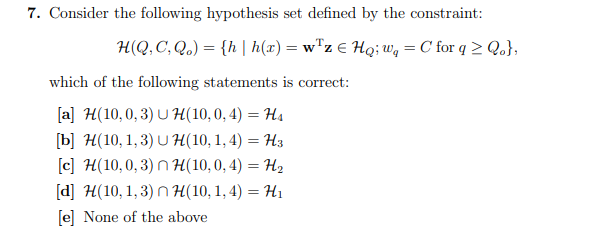

Correct Answer: **C**

$\mathcal{H}(10,0,3) \cap \mathcal{H}(10,0,4)$ corresponds to the restriction: $w_q = 0 \ \text{for} \ q \geq 3 \ \textbf{and} \ q \geq 4$. This is simply the intersection: $\mathcal{H}_2 \cap \mathcal{H}_3$ i.e. $\mathcal{H}_2$

<hr/>

# Neural Networks

## Question 8:

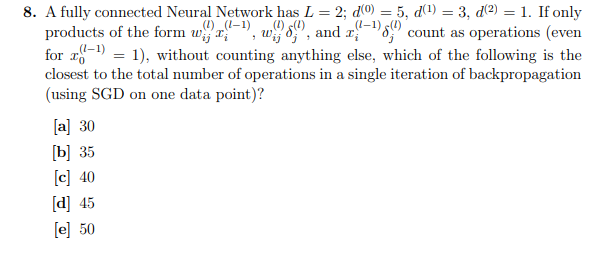

Correct Answer: **D**

The products correspond to three parts of the backpropagation algorithm:

<hr />

### Forward pass 
**Calculating the $x_j^{(l)}$ values**

$$
x_j^{(l)} = \theta\left(\sum_{i=0}^{d^{(l-1)}}w_{ij}^{(l)}x_{i}^{(l-1)}\right)
$$

- For $l = 1$ we need to calculate 3 values: $\{x_1^{(1)}, x_2^{(1)}, x_3^{(1)}\}$ each requiring 6 products (to evaluate the sum formula). Therefore we need 18 operations for the first layer.
- For $l = 2$ we need to calculate 1 value: $\{x_1^{(2)}\}$ requiring 4 products (to evaluate the sum formula). Therefore we need 4 operations for the second layer.

In total we need **22 operations** to perform the forward pass of the algorithm 

<hr />

### Backward pass
**Calculating the $\delta_i^{(l)}$ values**

$$
\delta_i^{(l-1)} = (1-(x_i^{(l-1)})^2)\sum_{j=1}^{d^{(l)}}w_{ij}^{(l)}\delta_{j}^{(l)}
$$

- By assumption the $\delta$ value in the last layer is assumed to be pre-calculated.
- Remains to calculate $\{\delta_1^{(1)},\delta_2^{(1)},\delta_3^{(1)}\}$ each of which only require 1 product to be evaluated. Therefore we need 3 operations for the first layer.

In total we need **3 operations** to perform the backward pass of the algorithm

<hr />

### Weight update
**Calculating the $w_{ij}^{(l)}$ values**

$$
\frac{\partial e(\mathbf{w})}{\partial w_{ij}^{(l)}} = \frac{\partial e(\mathbf{w})}{\partial s_{j}^{(l)}} \times \frac{\partial s_{j}^{(l)}}{\partial w_{ij}^{(l)}}
$$

- There are 18 layer 1 weights: $\{w_{ij}^{(1)}\}$ for $0 \leq i \leq 5, 1 \leq j \leq 3$ (which requires 18 operations to update)
- There are 4 layer 1 weights: $\{w_{ij}^{(2)}\}$ for $0 \leq i \leq 3, j=1$ (which requires 4 operations to update)

In total we need **22 operations** to perform the update pass of the algorithm 

**Total number of operations = 47** (closest to 45)

<hr/>

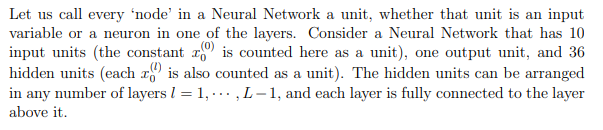

## Question 9:

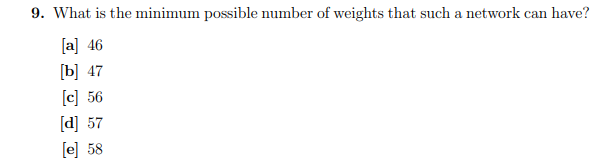

Correct Answer: **A**

46 weights - least number corresponds to a linear setup (36 hidden layers consisting of a single node in each layer)

10 weights (inputs to the first hidden layer)
36 weights out of each hidden layer

## Question 10:

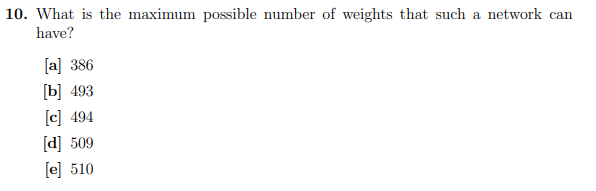

Correct Answer: **E** 

There are many different options for configurations of nodes. One basic design choice is the number of hidden layers to use. Since each layer is fully connected to the one above it is clear that a single hidden layer of 36 nodes will yield less weights than 2 layers of 18 nodes. Consider the following general 2-layer setup:

$$10-L_1-L_2-1 \ \text{where} \ L_1 + L_2 = 36$$

Each constant node $x_0^{(l)}$ has no weights associated to it (since it is always constant) so counting the number of weights from one layer to the next corresponds to the calculation: $(\text{number of nodes})\times(\text{number of nodes in the next layer -1})$

\begin{align*}
\text{Total number of weights} &= 10(L_1-1) + (L_1)(L_2-1) + L_2\\
&= 10(L_1-1) + (L_1)(36-L_1-1) + (36-L_1)\\
&= 26 + 44L_1 - L_1^2
\end{align*}

By differentiating we find the max occurs when $L_1 = 22$ corresponding to the layer setup: $10-22-14-1$ with total number of weights: 510